First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  

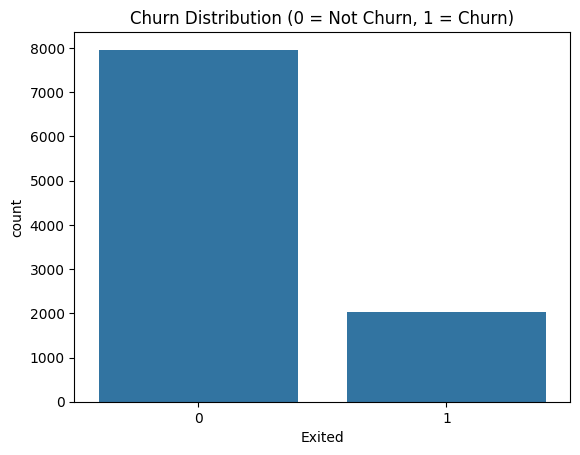


Churn Percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


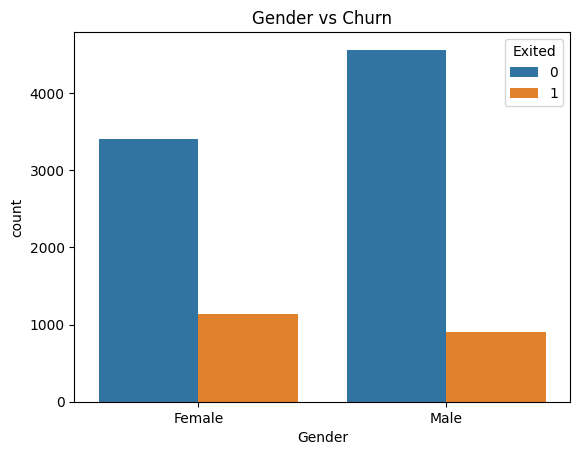

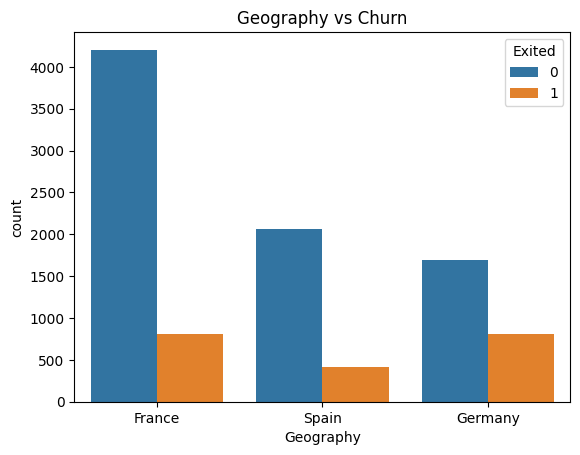

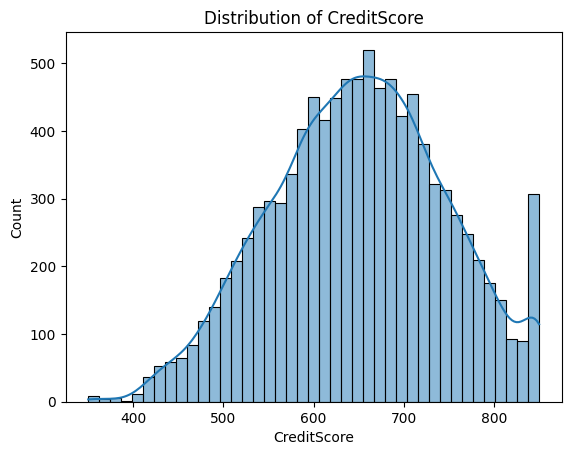

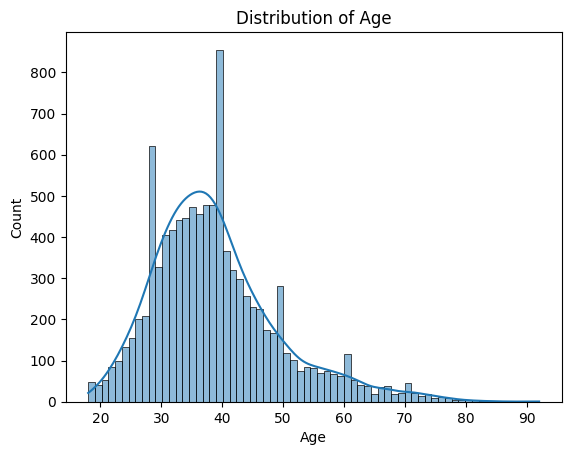

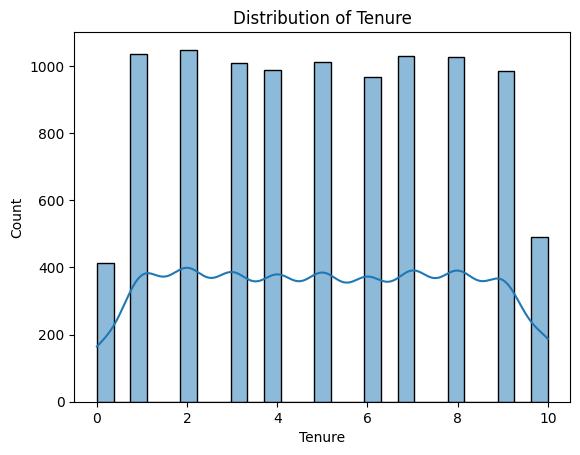

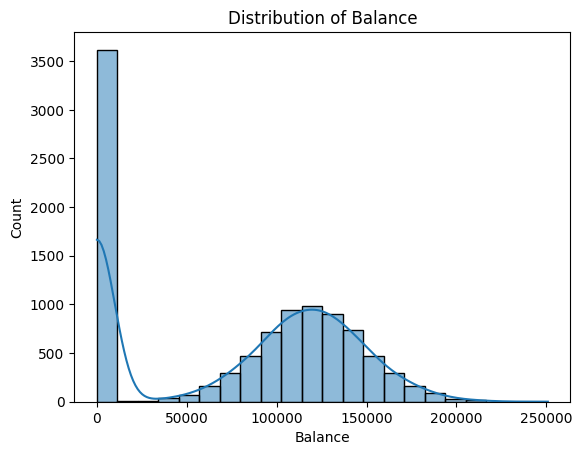

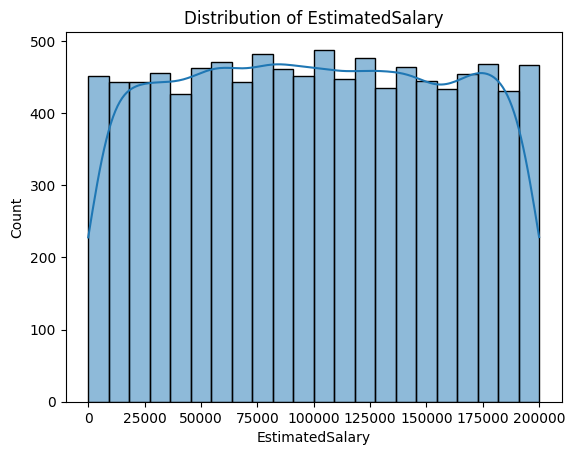

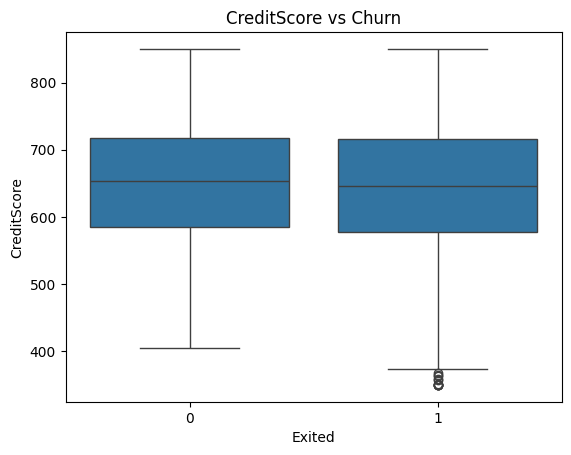

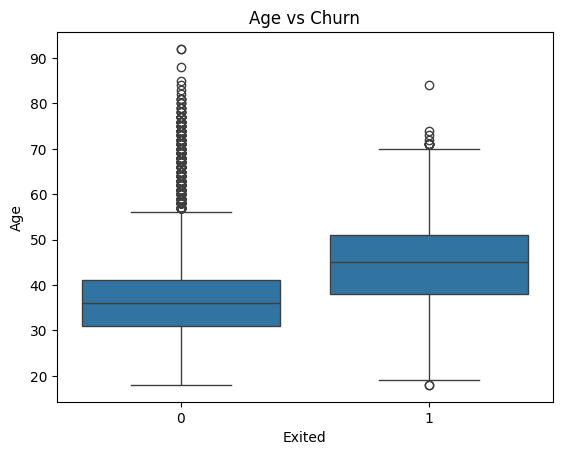

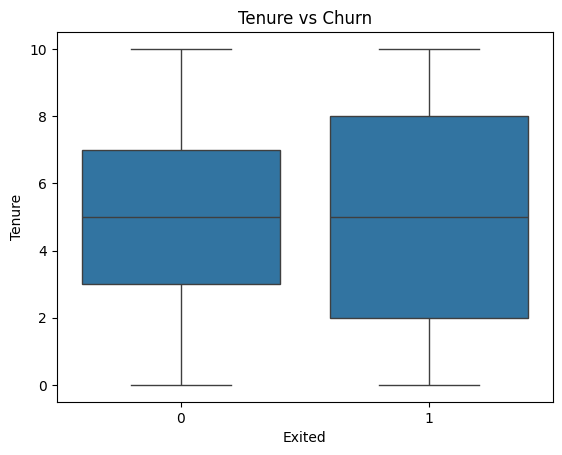

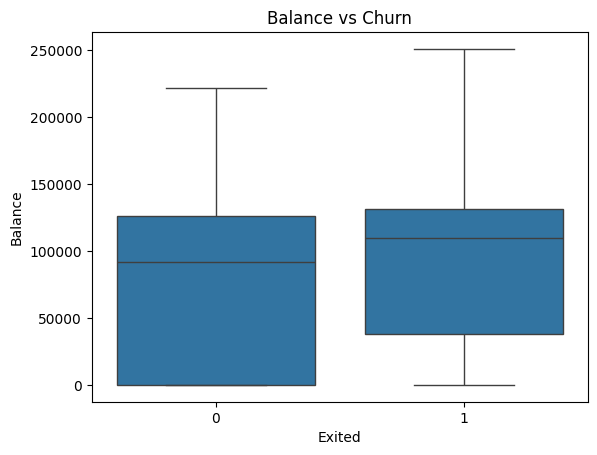

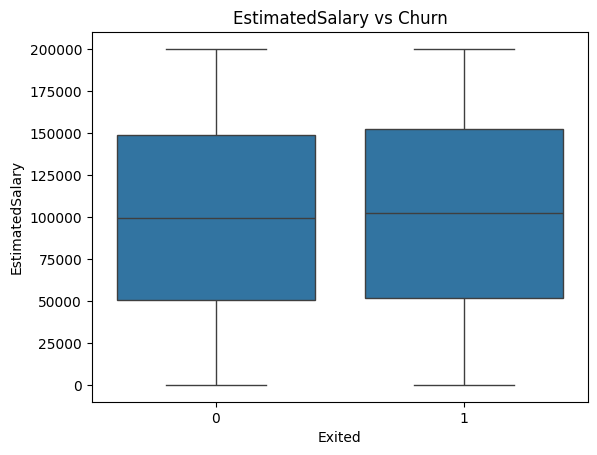

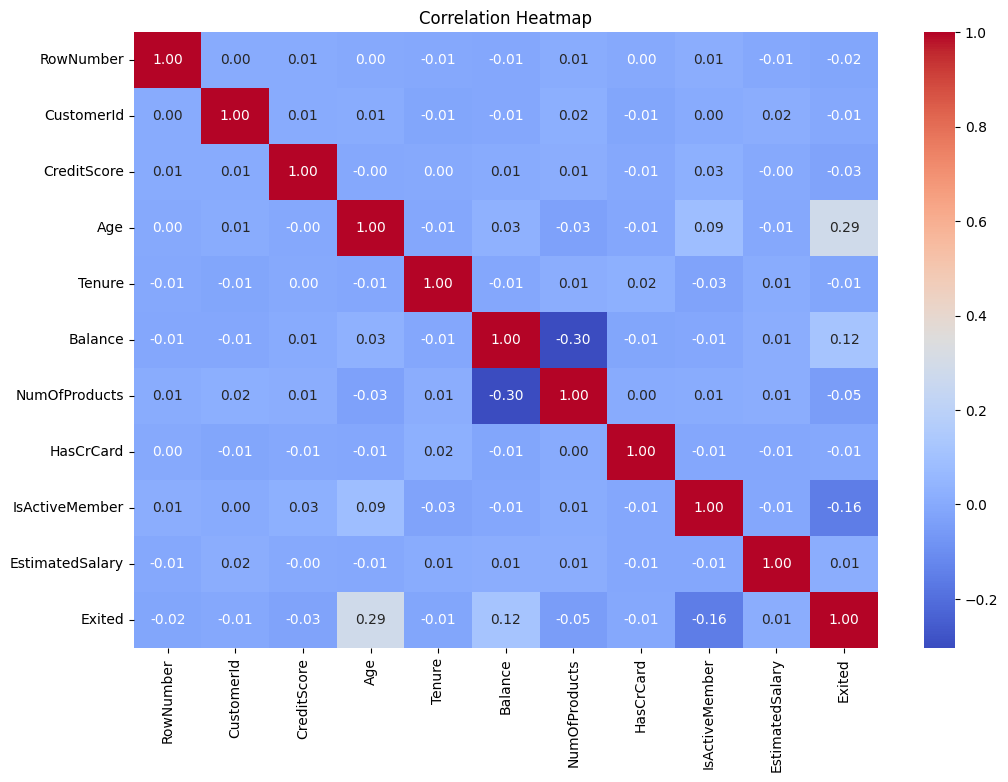

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. LOAD DATA
# =========================
df = pd.read_csv("Churn_Modelling.csv")

print("First 5 rows:")
print(df.head())

print("\nShape of dataset:", df.shape)

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


# =========================
# 2. CHECK MISSING VALUES
# =========================
print("\nMissing Values:")
print(df.isnull().sum())


# =========================
# 3. TARGET VARIABLE ANALYSIS
# =========================
plt.figure()
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution (0 = Not Churn, 1 = Churn)")
plt.show()

print("\nChurn Percentage:")
print(df["Exited"].value_counts(normalize=True) * 100)


# =========================
# 4. CATEGORICAL ANALYSIS
# =========================

# Gender vs Churn
plt.figure()
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Gender vs Churn")
plt.show()

# Geography vs Churn
plt.figure()
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Geography vs Churn")
plt.show()


# =========================
# 5. NUMERICAL ANALYSIS
# =========================
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# =========================
# 6. BOXPLOTS (Churn vs Numeric)
# =========================
for col in num_cols:
    plt.figure()
    sns.boxplot(x="Exited", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


# =========================
# 7. CORRELATION HEATMAP
# =========================
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
